In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import urllib
import warnings 

pd.options.display.max_columns = 999
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Load in the Wikipedia table data
url = "https://en.wikipedia.org/wiki/Nationwide_opinion_polling_for_the_2024_United_States_presidential_election" 

html_content = urllib.request.urlopen(url).read()

# Parse the HTML content with BeautifulSoup

soup = BeautifulSoup(html_content, 'html5lib')
table_dat = soup.find_all('table')


In [3]:
rfk_table = table_dat[10]

rfk_table_data = []
for row in rfk_table.find_all('tr'):
    row_data = [cell.text.strip() for cell in row.find_all(['td','th'])]
    rfk_table_data.append(row_data)

#Convert table data to a dataframe
#We remove the first row since this is RCP summary data that we don't want to use
    
rfk = pd.DataFrame(rfk_table_data[1:], columns=rfk_table_data[0])

rfk["Year"] = rfk["Date"].str.split(" ").str[-1]
rfk["Month"] = rfk["Date"].str.split(" ").str[0]
rfk["Day"] = rfk["Date"].str.split(" ").str[1].str.split("–").str[0]
rfk["New Date"] = rfk["Month"] + " " + rfk["Day"] + ", " + rfk["Year"]
rfk["New Date"] = pd.to_datetime(rfk["New Date"],format="mixed")
rfk['JoeBidenDemocratic'] = rfk['JoeBidenDemocratic'].str.rstrip('%').astype('float') / 100
rfk['DonaldTrumpRepublican'] = rfk['DonaldTrumpRepublican'].str.rstrip('%').astype('float') / 100
rfk["Robert F.Kennedy Jr.Independent"] = rfk["Robert F.Kennedy Jr.Independent"].str.rstrip('%').astype('float') / 100
rfk["Other/Undecided"] = 1 - rfk["JoeBidenDemocratic"] - rfk["DonaldTrumpRepublican"] - rfk["Robert F.Kennedy Jr.Independent"]
rfk.set_index("New Date", inplace=True)
rfk.drop("2023-10-09", inplace=True)
rfk["Spread"] = rfk["DonaldTrumpRepublican"] - rfk["JoeBidenDemocratic"]
rfk.head()

,Poll source,Date,Samplesize[b],Marginof error,JoeBidenDemocratic,DonaldTrumpRepublican,Robert F.Kennedy Jr.Independent,Other/Undecided,Year,Month,Day,Spread
New Date,,,,,,,,,,,,
2024-01-03,Reuters/Ipsos,"January 3–9, 2024","4,677 (RV)",± 1.5%,0.29,0.30,0.18,0.23,2024,January,3,0.01
2023-12-14,Quinnipiac University,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.38,0.36,0.22,0.04,2023,December,14,-0.02
2023-12-06,Rasmussen Reports,"December 6–7 & 10, 2023",892 (LV),± 3.0%,0.32,0.40,0.16,0.12,2023,December,6,0.08
2023-12-05,Cygnal (R),"December 5–7, 2023","2,000 (LV)",± 2.16%,0.42,0.43,0.09,0.06,2023,December,5,0.01
2023-11-15,Harvard/Harris,"November 15–16, 2023","2,851 (RV)",–,0.36,0.44,0.21,-0.01,2023,November,15,0.08


In [4]:
jbdt_table_2023 = table_dat[8]
jbdt_table_2024 = table_dat[7]

jbdt_table_2023_data = []
for row in jbdt_table_2023.find_all('tr'):
    row_data = [cell.text.strip() for cell in row.find_all(['td','th'])]
    jbdt_table_2023_data.append(row_data)

jbdt_table_2024_data = []
for row in jbdt_table_2024.find_all('tr'):
    row_data = [cell.text.strip() for cell in row.find_all(['td','th'])]
    jbdt_table_2024_data.append(row_data)

    
jbdt_2023 = pd.DataFrame(jbdt_table_2023_data[1:], columns=jbdt_table_2023_data[0])
jbdt_2024 = pd.DataFrame(jbdt_table_2024_data[1:], columns=jbdt_table_2024_data[0])
jbdt = pd.concat([jbdt_2023, jbdt_2024])
jbdt["Year"] = jbdt["Date"].str.split(" ").str[-1]
jbdt["Month"] = jbdt["Date"].str.split(" ").str[0]
jbdt["Day"] = jbdt["Date"].str.split(" ").str[1].str.split("–").str[0]
jbdt['JoeBidenDemocratic'] = jbdt['JoeBidenDemocratic'].str[:2].astype('float') / 100
jbdt['DonaldTrumpRepublican'] = jbdt['DonaldTrumpRepublican'].str[:2].astype('float') / 100
jbdt["Spread"] = jbdt["DonaldTrumpRepublican"] - jbdt["JoeBidenDemocratic"]
jbdt["Other/Undecided"] = 1 - jbdt["JoeBidenDemocratic"] - jbdt["DonaldTrumpRepublican"]
jbdt["New Date"] = jbdt["Month"] + " " + jbdt["Day"] + ", " + jbdt["Year"]
jbdt["New Date"] = pd.to_datetime(jbdt["New Date"],format="mixed")
jbdt.head()

,Poll source,Date,Samplesize[b],Marginof error,JoeBidenDemocratic,DonaldTrumpRepublican,Other/Undecided,Year,Month,Day,Spread,New Date
0,ActiVote,"December 13–19, 2023",841 (LV),± 3.4%,0.46,0.54,0.00,2023,December,13,0.08,2023-12-13
1,McLaughlin & Associates,"December 13–19, 2023","1,000 (LV)",–,0.44,0.47,0.09,2023,December,13,0.03,2023-12-13
2,The Economist/YouGov,"December 16–18, 2023","1,336 (RV)",± 3.2%,0.43,0.43,0.14,2023,December,16,0.00,2023-12-16
3,YouGov/Yahoo News,"December 14–18, 2023","1,027 (RV)",–,0.44,0.44,0.12,2023,December,14,0.00,2023-12-14
4,Quinnipiac University,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.47,0.46,0.07,2023,December,14,-0.01,2023-12-14


In [5]:
# Merge the two dataframes on new data

merged = pd.merge(rfk, jbdt, on=["New Date", "Poll source"], suffixes=('_RFK', '_JBDT'))
merged.head()

,New Date,Poll source,Date_RFK,Samplesize[b]_RFK,Marginof error_RFK,JoeBidenDemocratic_RFK,DonaldTrumpRepublican_RFK,Robert F.Kennedy Jr.Independent,Other/Undecided_RFK,Year_RFK,Month_RFK,Day_RFK,Spread_RFK,Date_JBDT,Samplesize[b]_JBDT,Marginof error_JBDT,JoeBidenDemocratic_JBDT,DonaldTrumpRepublican_JBDT,Other/Undecided_JBDT,Year_JBDT,Month_JBDT,Day_JBDT,Spread_JBDT
0,2024-01-03,Reuters/Ipsos,"January 3–9, 2024","4,677 (RV)",± 1.5%,0.29,0.30,0.18,0.23,2024,January,3,0.01,"January 3–9, 2024","4,677 (A)",± 1.5%,0.48,0.48,0.04,2024,January,3,0.00
1,2023-12-14,Quinnipiac University,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.38,0.36,0.22,0.04,2023,December,14,-0.02,"December 14–18, 2023","1,647 (RV)",± 2.4%,0.47,0.46,0.07,2023,December,14,-0.01
2,2023-12-06,Rasmussen Reports,"December 6–7 & 10, 2023",892 (LV),± 3.0%,0.32,0.40,0.16,0.12,2023,December,6,0.08,"December 6–10, 2023",892 (LV),± 3.0%,0.38,0.48,0.14,2023,December,6,0.10
3,2023-12-05,Cygnal (R),"December 5–7, 2023","2,000 (LV)",± 2.16%,0.42,0.43,0.09,0.06,2023,December,5,0.01,"December 5–7, 2023","2,000 (LV)",± 2.16%,0.47,0.46,0.07,2023,December,5,-0.01
4,2023-11-13,Reuters/Ipsos,"November 13–14, 2023","1,006 (RV)",± 3.8%,0.30,0.32,0.20,0.18,2023,November,13,0.02,"November 13–14, 2023","1,006 (A)",± 3.8%,0.33,0.35,0.32,2023,November,13,0.02


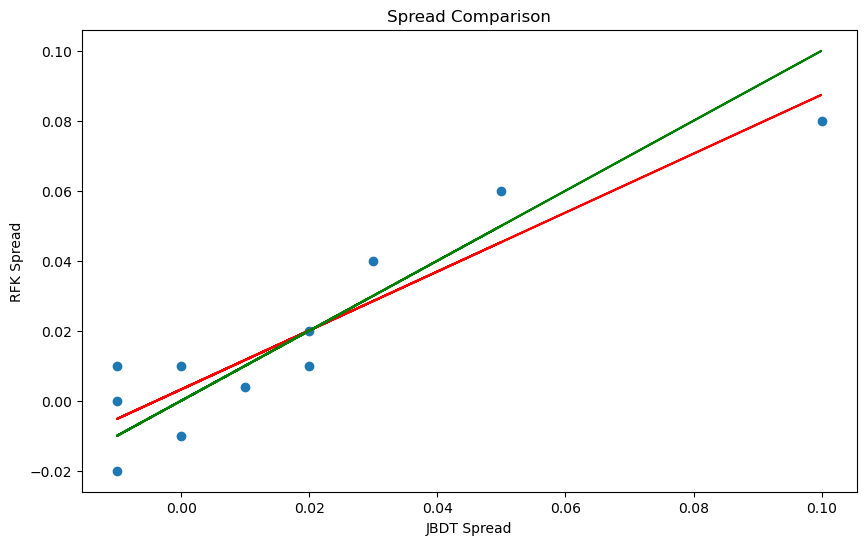

In [6]:
#Scatterplot the two different spreads

plt.figure(figsize=(10,6))
plt.scatter(merged["Spread_JBDT"],merged["Spread_RFK"])
# add trendline

p = np.poly1d(np.polyfit(merged["Spread_JBDT"], merged["Spread_RFK"], 1))

#plot polynomial line
plt.plot(merged["Spread_JBDT"], p(merged["Spread_JBDT"]), color="red")

#plot y =x 

plt.plot(merged["Spread_JBDT"], merged["Spread_JBDT"], color="green")

plt.title("Spread Comparison")
plt.xlabel("JBDT Spread")
plt.ylabel("RFK Spread")
plt.show()

In [7]:
#Make the same plot as above but much better looking 

fig = px.scatter(merged, x="Spread_RFK", y="Spread_JBDT", trendline="ols", title="Spread Comparison")
fig.show()


## Interpreting the Spread Comparison

We see that there is a linear relationship between how Joe Biden and Trump perform when RFK Jr is present on the ballot. This intuitively makes sense; if Trump is crushing Biden, he will still be performing well even if RFK Jr is present on the ballot. The reverse is also true.

What is interesting is that the slope of this line is less than 1; it is much less than 1. This implies that regardless of who is winning the spread, the poll results are closer when RFK Jr is on the ballot. 

Why is this the case?

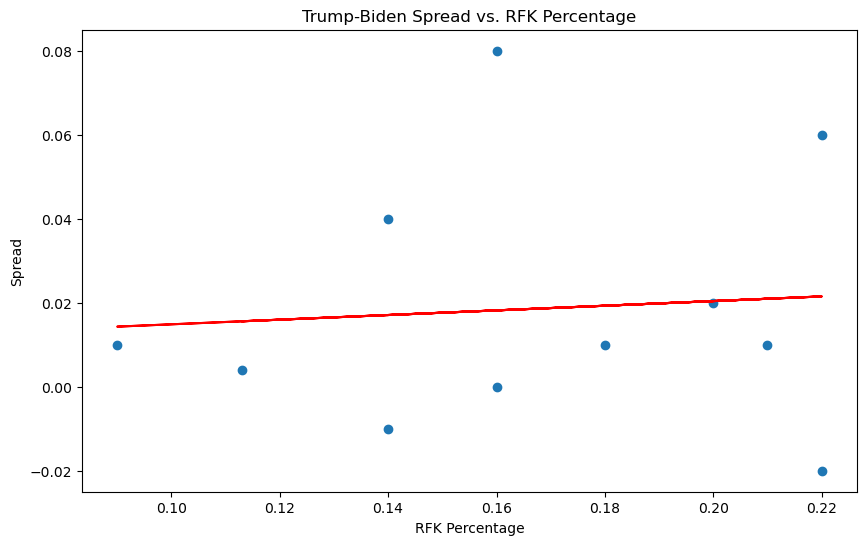

In [8]:
#Just scatter the RFK percentage with the spread

plt.figure(figsize=(10,6))
plt.scatter(merged["Robert F.Kennedy Jr.Independent"], merged["Spread_RFK"])
plt.title("Trump-Biden Spread vs. RFK Percentage")
# add trendline

z = np.polyfit(merged["Robert F.Kennedy Jr.Independent"], merged["Spread_RFK"], 1)
p = np.poly1d(z)
plt.plot(merged["Robert F.Kennedy Jr.Independent"],p(merged["Robert F.Kennedy Jr.Independent"]), color="red")

plt.xlabel("RFK Percentage")
plt.ylabel("Spread")
plt.show()

In [9]:
# Make the same scatter plot but much better looking

fig = px.scatter(merged, x="Robert F.Kennedy Jr.Independent", y="Spread_RFK", trendline="ols", title="Trump-Biden Spread vs. RFK Percentage")
fig.update_layout(
    title="Trump-Biden Spread vs. RFK Percentage",
    xaxis_title="RFK Percentage",
    yaxis_title="Trump-Biden Spread",
)
fig.show()

## Interpreting RFK's Performance Against The Spread

As RFK does better, there is a slight correlation towards Trump. It is unclear if this is actually evidence that RFK jr improves Trump's winning odds, or more of a reflection that Biden is losing popularity in the polls. 

The slope of the line is only 0.22. Even when RFK JR is performing exceptionally well, neither candidate sees a strong gain. 

It has been reported that RFK JR pulls relatively equal from both parties, which this line somewhat substantiates. 


## How does RFK Pull Proportionally from Each Candidate?

In [10]:
#Investigate what's going on with undecided voters
#How does the undecided percentage relate to the number of candidates on the ballot?

cw_table = table_dat[12]

cw_table_data = []
for row in cw_table.find_all('tr'):
    row_data = [cell.text.strip() for cell in row.find_all(['td','th'])]
    cw_table_data.append(row_data)

#Convert table data to a dataframe
#We remove the first row since this is RCP summary data that we don't want to use
    
cw = pd.DataFrame(cw_table_data[1:], columns=cw_table_data[0])

cw["Year"] = cw["Date"].str.split(" ").str[-1]
cw["Month"] = cw["Date"].str.split(" ").str[0]
cw["Day"] = cw["Date"].str.split(" ").str[1].str.split("–").str[0]
cw["New Date"] = cw["Month"] + " " + cw["Day"] + ", " + cw["Year"]
cw["New Date"] = pd.to_datetime(cw["New Date"],format="mixed")
cw['JoeBidenDemocratic'] = cw['JoeBidenDemocratic'].str.rstrip('%').astype('float') / 100
cw['DonaldTrumpRepublican'] = cw['DonaldTrumpRepublican'].str.rstrip('%').astype('float') / 100
cw["Robert F.Kennedy Jr.Independent"] = cw["Robert F.Kennedy Jr.Independent"].str.rstrip('%').astype('float') / 100
cw["CornelWestIndependent"] = cw["CornelWestIndependent"].str.rstrip('%').astype('float') / 100

cw.set_index("New Date", inplace=True)
cw.drop(["2023-10-05","2023-10-09"], inplace=True)
cw["Other/Undecided"] = np.float32(1 - cw["JoeBidenDemocratic"] - cw["DonaldTrumpRepublican"] - cw["Robert F.Kennedy Jr.Independent"] - cw["CornelWestIndependent"])
cw["Spread"] = cw["DonaldTrumpRepublican"] - cw["JoeBidenDemocratic"]
cw

,Poll source,Date,Samplesize[b],Marginof error,JoeBidenDemocratic,DonaldTrumpRepublican,Robert F.Kennedy Jr.Independent,CornelWestIndependent,Other/Undecided,Year,Month,Day,Spread
New Date,,,,,,,,,,,,,
2023-11-29,SSRS/CNN,"November 29 – December 6, 2023","1,197 (RV)",± 3.4%,0.310,0.390,0.200,0.060,4.000000e-02,2023,November,29,0.080
2023-11-22,HarrisX,"November 22–28, 2023","4,003 (RV)",–,0.330,0.410,0.130,0.020,1.100000e-01,2023,November,22,0.080
2023-11-15,HarrisX/The Messenger,"November 15–19, 2023","3,017 (LV)",± 1.8%,0.330,0.400,0.140,0.020,1.100000e-01,2023,November,15,0.070
2023-10-30,Big Village,"October 30 – November 5, 2023","1,497 (LV)",± 2.2%,0.371,0.401,0.124,0.017,8.700000e-02,2023,October,30,0.030
2023-10-27,CNN/SSRS,"October 27 – November 2, 2023","1,271 (RV)",± 3.1%,0.350,0.410,0.160,0.040,4.000000e-02,2023,October,27,0.060
2023-10-30,HarrisX/The Messenger,"October 30 – November 1, 2023","2,021 (RV)",± 2.2%,0.360,0.410,0.110,0.020,1.000000e-01,2023,October,30,0.050
2023-10-26,Quinnipiac University,"October 26–30, 2023","1,610 (RV)",± 2.4%,0.360,0.350,0.190,0.060,4.000000e-02,2023,October,26,-0.010
2023-10-23,McLaughlin and Associates (R),"October 23–26, 2023",449 (LV),± 3.1%,0.350,0.380,0.120,0.020,1.300000e-01,2023,October,23,0.030
2023-10-16,Harris X/The Messenger,"October 16–23, 2023","3,029 (RV)",± 1.8%,0.350,0.380,0.130,0.020,1.200000e-01,2023,October,16,0.030


Average percentage of undecided voters for Joe Biden and Donald Trump:  0.11768361581920911
Average percentage of undecided voters for Joe Biden, Donald Trump, Robert F. Kennedy Jr.:  0.08741666666666666
Average percentage of undecided voters for Joe Biden, Donald Trump, RFK Jr, Cornel West :  0.07975


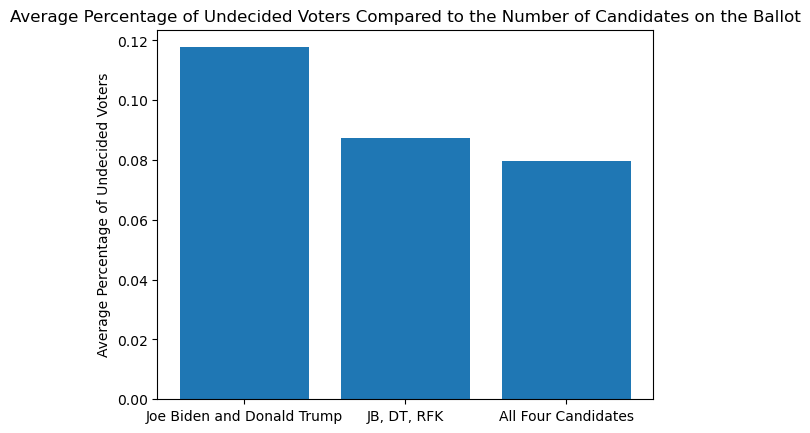

In [11]:
# Calculate the average percentage of undecided voters compared to the number of candidates on the ballot

jbdt_avg = jbdt["Other/Undecided"].mean()
rfk_avg = rfk["Other/Undecided"].mean()
cw_avg = cw["Other/Undecided"].mean()

print("Average percentage of undecided voters for Joe Biden and Donald Trump: ", jbdt_avg)
print("Average percentage of undecided voters for Joe Biden, Donald Trump, Robert F. Kennedy Jr.: ", rfk_avg)
print("Average percentage of undecided voters for Joe Biden, Donald Trump, RFK Jr, Cornel West : ", cw_avg)

#Plot the average percentage of undecided voters compared to the number of candidates on the ballot

fig, ax = plt.subplots()
ax.bar(["Joe Biden and Donald Trump", "JB, DT, RFK", "All Four Candidates"], [jbdt_avg, rfk_avg, cw_avg])
ax.set_ylabel("Average Percentage of Undecided Voters")
ax.set_title("Average Percentage of Undecided Voters Compared to the Number of Candidates on the Ballot")
plt.show()




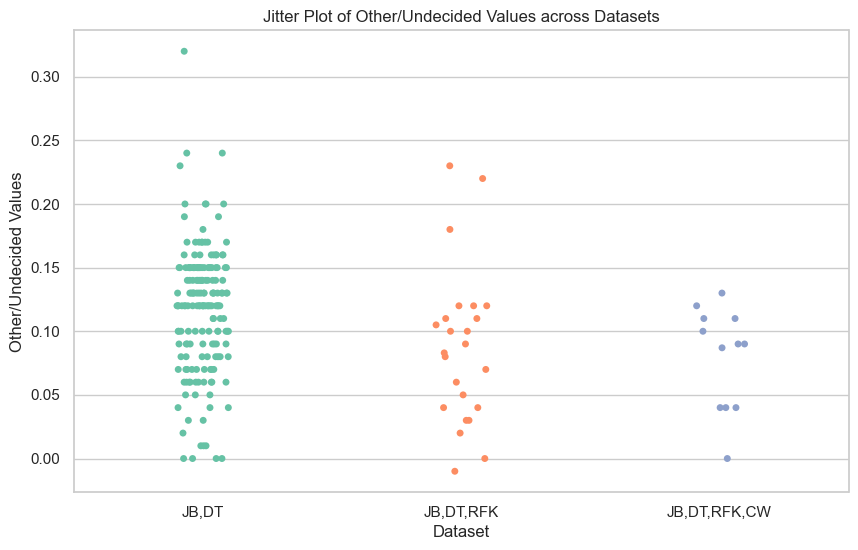

In [12]:
#Remake the above plot by making a jitter plot of the undecided percentage for each poll

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df1, df2, and df3 are your three DataFrames
# with an "Other/Undecided" column

# Combine the datasets into a single DataFrame
combined_df = pd.concat([jbdt["Other/Undecided"].reset_index(drop=True),
                        rfk["Other/Undecided"].reset_index(drop=True),
                        cw["Other/Undecided"].reset_index(drop=True)],
                       axis=1, keys=['JB,DT', 'JB,DT,RFK', 'JB,DT,RFK,CW'])

# Melt the DataFrame for Seaborn's jitter plot
melted_df = combined_df.melt(var_name='Dataset', value_name='Other/Undecided')

# Create a jitter plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Adjust the jitter to your preference
sns.stripplot(x='Dataset', y='Other/Undecided', data=melted_df, jitter=True, palette="Set2")

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Other/Undecided Values')
plt.title('Jitter Plot of Other/Undecided Values across Datasets')

# Show the plot
plt.show()



## Why are there less undecided voters when we add more candidates to the ballot?

The initial argument could be that there do exist independent voters who truly will vote for anyone except for Trump and Biden. 

But I find it surprising that adding Cornel West lowers the undecided voter count, even by a percentage point. Is there really a percentage of voters who are so educated on Joe Biden, Donald Trump, and RFK Jr that adding a relatively unkown candidate would fit their needs? I am not too sure. 



# Next Steps

- We still want to investigate key demographic trends.
- We need to find a good dataset for Exit Polls from 2020. 
- Think of other questions to investigate??

In [13]:
#Plot a categorical regression

#Plot polling companies vs. spread

#Demographics




<Figure size 1000x600 with 0 Axes>

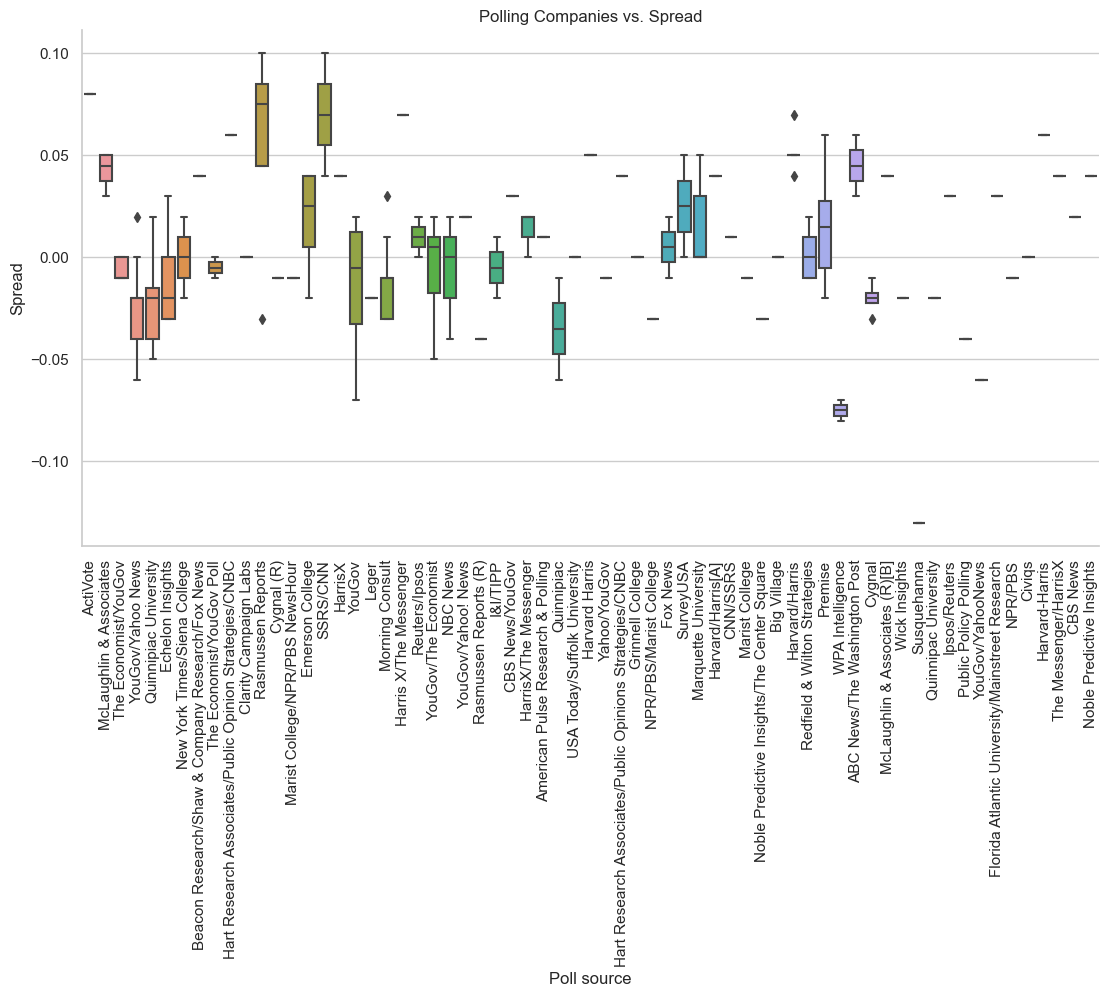

In [14]:
#Make categorical data plot of polling companies vs. spread

plt.figure(figsize=(10,6))

sns.catplot(x="Poll source", y="Spread", data=jbdt, kind="box", height=6, aspect=2)
plt.xticks(rotation=90)
plt.title("Polling Companies vs. Spread")
plt.show()





In [21]:
import statsmodels.api as sm

dummy_jbdt = pd.concat([jbdt, pd.get_dummies(jbdt["Poll source"], drop_first=True,dtype=int)], axis=1)



X = dummy_jbdt[pd.get_dummies(jbdt["Poll source"], drop_first=True,dtype=int).columns]
y = dummy_jbdt["Spread"].to_list()


X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     4.500
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.89e-12
Time:                        00:38:27   Log-Likelihood:                 457.23
No. Observations:                 177   AIC:                            -784.5
Df Residuals:                     112   BIC:                            -578.0
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        0.0450      0.016      2.770      0.007       0.013       0.077
ActiVote                                                     0.0350      0.028      1.244      0.216      -0.021       0.091
American Pulse Research & Polling                           -0.0350      0.028     -1.244      0.216      -0.091       0.021
Beacon Research/Shaw & Company Research/Fox News            -0.0050      0.023     -0.218      0.828      -0.051       0.041
Big Village                                                 -0.0450      0.028     -1.599      0.113      -0.101       0.011
CBS News                                                    -0.0250      0.028     -0.888      0.376      -0.081       0.031
CBS News/YouGov                                             -0.0150      0.028     -0.533      0.595      -0.071       0.041
CNN/SSRS                                                    -0.0350      0.028     -1.244      0.216      -0.091       0.021
Civiqs                                                      -0.0450      0.028     -1.599      0.113      -0.101       0.011
Clarity Campaign Labs                                       -0.0450      0.028     -1.599      0.113      -0.101       0.011
Cygnal                                                      -0.0650      0.020     -3.267      0.001      -0.104      -0.026
Cygnal (R)                                                  -0.0550      0.028     -1.955      0.053      -0.111       0.001
Echelon Insights                                            -0.0564      0.018     -3.063      0.003      -0.093      -0.020
Emerson College                                             -0.0262      0.018     -1.445      0.151      -0.062       0.010
Florida Atlantic University/Mainstreet Research             -0.0150      0.028     -0.533      0.595      -0.071       0.041
Fox News                                                    -0.0400      0.023     -1.741      0.084      -0.086       0.006
Grinnell College                                            -0.0450      0.028     -1.599      0.113      -0.101       0.011
Harris X/The Messenger                                       0.0250      0.028      0.888      0.376      -0.031       0.081
HarrisX                                                     -0.0050      0.028     -0.178      0.859      -0.061       0.051
HarrisX/The Messenger                                       -0.0317      0.021     -1.510      0.134      -0.073       0.010
Hart Research Associates/Public Opinion Strategies/CNBC      0.0150      0.028      0.533      0.595      -0.041       0.071
Hart Research Associates/Public Opinions Strategies/CNBC    -0.0050      0.028     

dtype('float64')